In [2]:
import sys
from PyQt5 import uic
from PyQt5.QtWidgets import QApplication, QMainWindow

In [3]:
class musicSetup_GUI(QMainWindow):
    def __init__(self):
        super().__init__()
        uic.loadUi('gui.ui', self)

        #volver invisible el boton
        self.mainDetectarNotas.setVisible(False)
        self.frame_12.setVisible(True)
        

        #Botones
        self.BdetectarNota.clicked.connect(self.detectarNotas)
        self.BacercaDe.clicked.connect(self.acercaDe)

    def detectarNotas(self):
        self.mainDetectarNotas.setVisible(True)
        self.BdetectarNota.setEnabled(False)
        self.BacercaDe.setEnabled(True)
    
    def acercaDe(self):
        self.mainDetectarNotas.setVisible(False)
        self.BdetectarNota.setEnabled(True)
        self.BacercaDe.setEnabled(False)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    window = musicSetup_GUI()
    window.show()
    sys.exit(app.exec_())

SystemExit: 0

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
#Funciones para conseguir los 0.05 anteriores y los 0.05 seguientes de un Hz

def nAnteriores(Hz):
    vAnteriores = np.array([], dtype=float)
    for i in range(5):
        valor = 5/10 - i/10
        vAnteriores = np.append(vAnteriores, (Hz - valor))
    return vAnteriores

def nSiguientes(Hz):
    vSiguientes = np.array([], dtype=float)
    for i in range(5):
        valor = i/10 + 1/10
        vSiguientes = np.append(vSiguientes, (Hz + valor))
    return vSiguientes

#Funciones para acumular los valores anteiores y siguientes.

def vAnteriores(Hz):
    valoresAnteriores = np.array([], dtype=float)
    valoresAnteriores = np.append(valoresAnteriores, nAnteriores(Hz))
    valoresAnteriores = np.append(valoresAnteriores, Hz)
    return valoresAnteriores

def vSiguientes(Hz):
    valoresSiguientes = np.array([], dtype=float)
    valoresSiguientes = np.append(valoresSiguientes, nSiguientes(Hz))
    return valoresSiguientes

#Funcion para el guardado automatico de las frecuencias en un array.

def LlenadoAutomaticoDeHz(Hz):
    allHz = np.array([], dtype=float)
    allHz = np.append(allHz, vAnteriores(Hz))
    allHz = np.append(allHz, vSiguientes(Hz))
    return allHz

def RedondeoAutomatico(Hz):
    valores = np.array([], dtype=float)
    for i in range(len(Hz)):
        valores = np.append(valores, round(Hz[i], 3))
    return valores

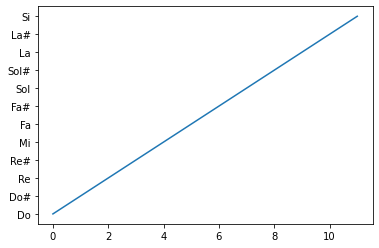

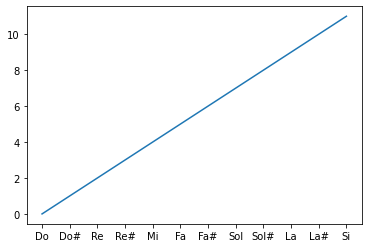

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Definicion de la primera frecuencia de cada nota musical y del array con los nombre de las notas.

hzInicialFa = 21.826            
hzInicialFaS = 23.125           
hzInicialSol = 24.50            
hzInicialSolS = 25.96
hzInicialLa = 27.50
hzInicialLaS = 29.14
hzInicialSi = 30.87
hzInicialDo = 32.7              
hzInicialDoS = 34.65
hzInicialRe = 36.71
hzInicialReS = 38.89
hzInicialMi = 41.2

hzIniciales = np.array([hzInicialFa, hzInicialFaS, hzInicialSol, hzInicialSolS, hzInicialLa, hzInicialLaS, hzInicialSi, hzInicialDo, hzInicialDoS, hzInicialRe, hzInicialReS, hzInicialMi], dtype=float)

nombreNota = np.array(['Fa','Fa#','Sol','Sol#','La','La#','Si','Do','Do#','Re','Re#','Mi'], dtype = str)

#Frecuencias de Fa, Fa# y Sol
FaFaSSolHz = np.array([], dtype=float)
for i in range(3):                                                          #Tomo las notas Fa, Fa# y Sol
    for j in range(9):                                                      
        Hz2 = hzIniciales[i] * (2 ** j)                                     #Multiplico por 2 para que sean las notas de la octava superior
        FaFaSSolHz = np.append(FaFaSSolHz, LlenadoAutomaticoDeHz(Hz2))
        FaFaSSolHz = RedondeoAutomatico(FaFaSSolHz)

#Frecuencias de Sol#, La, La#, Si, Do, Do#, Re, Re#, Mi
allHz = np.array([], dtype=float)
for i in range(3, 12):
    for j in range(8):
        Hz2 = hzIniciales[i] * (2 ** j)
        allHz = np.append(allHz, LlenadoAutomaticoDeHz(Hz2))
        allHz = RedondeoAutomatico(allHz)

#Ingreso de las frecuencias en los array de las notas Fa, Fa#, Sol
# 99 valores en total para cada nota.

total = 99

FaHz = np.array([], dtype=float)
for i in range(total):
    FaHz = np.append(FaHz, FaFaSSolHz[i])

FaSHz = np.array([], dtype=float)
for i in range(total, total*2):
    FaSHz = np.append(FaSHz, FaFaSSolHz[i])

SolHz = np.array([], dtype=float)
for i in range(total*2, total*3):
    SolHz = np.append(SolHz, FaFaSSolHz[i])

#Ingreso de las frecuencias en los array de las notas Sol#, La, La#, Si, Do, Do#, Re, Re#, Mi
# 88 valores en total para cada nota.

total2 = 88

SolSHz = np.array([], dtype=float)
for i in range(total2):
    SolSHz = np.append(SolSHz, allHz[i])

LaHz = np.array([], dtype=float)
for i in range(total2, total2*2):
    LaHz = np.append(LaHz, allHz[i])

LaSHz = np.array([], dtype=float)
for i in range(total2*2, total2*3):
    LaSHz = np.append(LaSHz, allHz[i])

SiHz = np.array([], dtype=float)
for i in range(total2*3, total2*4):
    SiHz = np.append(SiHz, allHz[i])

DoHz = np.array([], dtype=float)
for i in range(total2*4, total2*5):
    DoHz = np.append(DoHz, allHz[i])

DoSHz = np.array([], dtype=float)
for i in range(total2*5, total2*6):
    DoSHz = np.append(DoSHz, allHz[i])

ReHz = np.array([], dtype=float)
for i in range(total2*6, total2*7):
    ReHz = np.append(ReHz, allHz[i])

ReSHz = np.array([], dtype=float)
for i in range(total2*7, total2*8):
    ReSHz = np.append(ReSHz, allHz[i])

MiHz = np.array([], dtype=float)
for i in range(total2*8, total2*9):
    MiHz = np.append(MiHz, allHz[i])


ejeX = np.array([0,1,2,3,4,5,6,7,8,9,10,11], dtype=float)
ejeY = np.array(["Do", "Do#", "Re", "Re#", "Mi", "Fa", "Fa#", "Sol", "Sol#", "La", "La#", "Si"], dtype=str)


grafico = plt.plot(ejeX, ejeY)
#mostrar grafico
plt.show()

grafico2 = plt.plot(ejeY, ejeX)
#mostrar grafico
plt.show()